In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread(r'./bruno_mars/Bruno.jpg')
img.shape

(750, 900, 3)

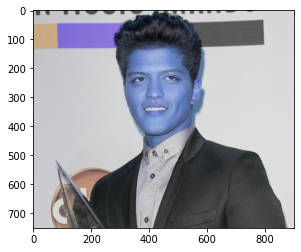

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
gray.shape

(750, 900)

In [6]:
gray

array([[194, 195, 195, ..., 215, 215, 215],
       [196, 197, 197, ..., 214, 214, 215],
       [196, 197, 197, ..., 213, 214, 214],
       ...,
       [204, 205, 206, ..., 221, 221, 221],
       [204, 205, 206, ..., 221, 221, 221],
       [205, 206, 206, ..., 221, 222, 222]], dtype=uint8)

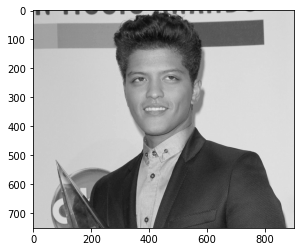

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[287, 136, 267, 267]], dtype=int32)

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(287, 136, 267, 267)

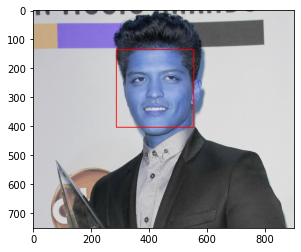

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

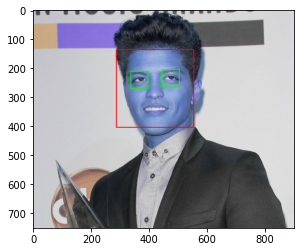

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

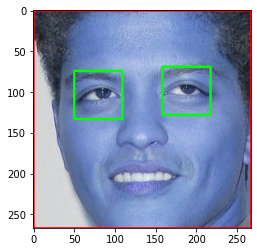

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color   
    else:
        exit(1)

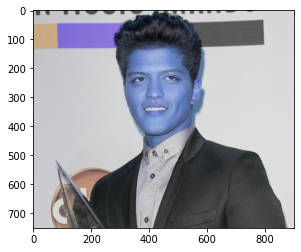

In [14]:
original_image = cv2.imread(r'./bruno_mars/Bruno.jpg')
plt.imshow(original_image)

In [15]:
cropped_image = get_cropped_image_if_2_eyes(r'./bruno_mars/Bruno.jpg')

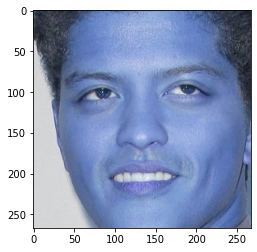

In [16]:
cropped_image = get_cropped_image_if_2_eyes(r'./bruno_mars/Bruno.jpg')
plt.imshow(cropped_image)

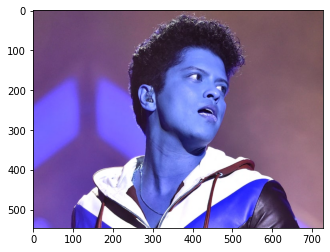

In [17]:
org_image_obstructed = cv2.imread(r'./bruno_mars/bruno_2.jpg')
plt.imshow(org_image_obstructed)

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r'./bruno_mars/bruno_2.jpg')
cropped_image_no_2_eyes

In [19]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./dataset/bruno_mars',
 './dataset/cropped',
 './dataset/demi_lovato',
 './dataset/ed_sheeran',
 './dataset/selena_gomez',
 './dataset/taylor_swift']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

bruno_mars
cropped
demi_lovato
ed_sheeran
selena_gomez
taylor_swift


In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

bruno_mars
Generating cropped images in folder:  ./dataset/cropped/bruno_mars
cropped
demi_lovato
Generating cropped images in folder:  ./dataset/cropped/demi_lovato
ed_sheeran
Generating cropped images in folder:  ./dataset/cropped/ed_sheeran
selena_gomez
Generating cropped images in folder:  ./dataset/cropped/selena_gomez
taylor_swift
Generating cropped images in folder:  ./dataset/cropped/taylor_swift


In [25]:
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

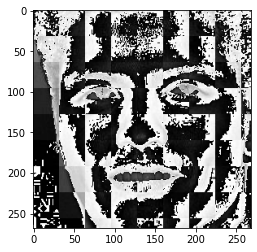

In [26]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [27]:
celebrity_file_names_dict

{'bruno_mars': ['./dataset/cropped/bruno_mars/bruno_mars1.png',
  './dataset/cropped/bruno_mars/bruno_mars2.png',
  './dataset/cropped/bruno_mars/bruno_mars3.png',
  './dataset/cropped/bruno_mars/bruno_mars4.png',
  './dataset/cropped/bruno_mars/bruno_mars5.png',
  './dataset/cropped/bruno_mars/bruno_mars6.png',
  './dataset/cropped/bruno_mars/bruno_mars7.png',
  './dataset/cropped/bruno_mars/bruno_mars8.png',
  './dataset/cropped/bruno_mars/bruno_mars9.png',
  './dataset/cropped/bruno_mars/bruno_mars10.png',
  './dataset/cropped/bruno_mars/bruno_mars11.png',
  './dataset/cropped/bruno_mars/bruno_mars12.png',
  './dataset/cropped/bruno_mars/bruno_mars13.png',
  './dataset/cropped/bruno_mars/bruno_mars14.png',
  './dataset/cropped/bruno_mars/bruno_mars15.png',
  './dataset/cropped/bruno_mars/bruno_mars16.png',
  './dataset/cropped/bruno_mars/bruno_mars17.png',
  './dataset/cropped/bruno_mars/bruno_mars18.png',
  './dataset/cropped/bruno_mars/bruno_mars19.png',
  './dataset/cropped/bruno

In [28]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'bruno_mars': 0,
 'cropped': 1,
 'demi_lovato': 2,
 'ed_sheeran': 3,
 'selena_gomez': 4,
 'taylor_swift': 5}

In [29]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [30]:
len(X[0])

4096